# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

#### Load dependencies

In [1]:
import tensorflow
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

2023-04-02 23:15:14.280268: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 23:15:14.380300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 23:15:14.380319: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 23:15:14.870238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data() # X - inputs, y - outputs

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

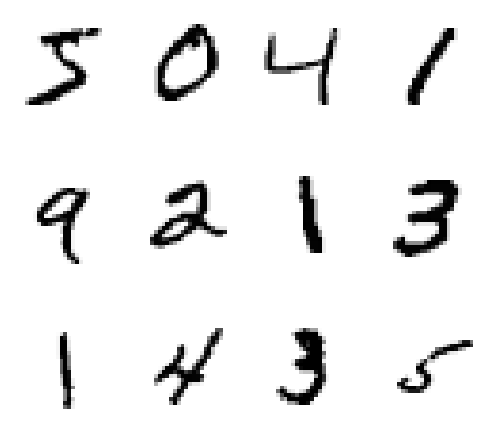

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

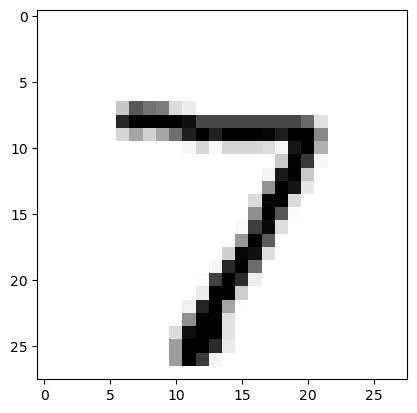

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255 # 输入数据的定义域从[0,255]压缩到[0,1]
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design NN arch

In [17]:
model = Sequential()

# hidden layer:
# 定义第一个隐藏层时，也需要通过input_shape参数定义输入层
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

# output layer:
model.add(Dense(10, activation='softmax'))

2023-04-02 23:15:22.073740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-02 23:15:22.073909: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-02 23:15:22.074197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (home-wsl): /proc/driver/nvidia/version does not exist
2023-04-02 23:15:22.075069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


隐藏层的输入参数中包含的权重数量

In [27]:
(64*784)

50176

隐藏层的参数总数=权重数量+偏置数量

In [28]:
(64*784)+64

50240

输出层的参数总数

In [29]:
(10*64)+10

650

#### Compile model

In [19]:
# 在模型编译步骤中把优化器设置为SGD，以使用随机梯度下降（stochastic gradient descent)
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # SGD: stochastic gradient descent,随机梯度下降法

#### Train!

In [20]:
# 批次大小(batch siye)、网络训练总次数(epochs)都是超参数(hyper parameter)
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200


2023-04-02 23:15:22.585348: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.1038 - val_loss: 0.0913 - val_accuracy: 0.1090
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.1179 - val_loss: 0.0906 - val_accuracy: 0.1208
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.1392 - val_loss: 0.0901 - val_accuracy: 0.1446
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.1681 - val_loss: 0.0896 - val_accuracy: 0.1833
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.2051 - val_loss: 0.0893 - val_accuracy: 0.2224
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.2398 - val_loss: 0.0889 - val_accuracy: 0.2527
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.2693 - val_loss: 0.0886 - val_accuracy: 0.2790
Epoch 8/200

#### Evaluating model performance

In [21]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.8691


[0.026485485956072807, 0.8690999746322632]

In [22]:
valid0 = X_valid[0].reshape(1, 784)

In [23]:
predict_0 = model.predict(valid0)

1/1 [==============================] - 0s 51ms/step


In [24]:
import numpy as np
np.argmax(predict_0,axis=1)

array([7])